## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 加载数据

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)).astype('float32') / 255.
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)).astype('float32') / 255.

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [5]:
num_classes = train_labels.shape[1]

## 模型定义

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
__________________________________________________

## 优化和损失

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 开始训练

In [8]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2277 - accuracy: 0.9356 - val_loss: 0.0765 - val_accuracy: 0.9770
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0469 - val_accuracy: 0.9856
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0423 - val_accuracy: 0.9864
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0381 - val_accuracy: 0.9873
Epoch 7/10
60000/60000 [==============================] 

## 梯度图

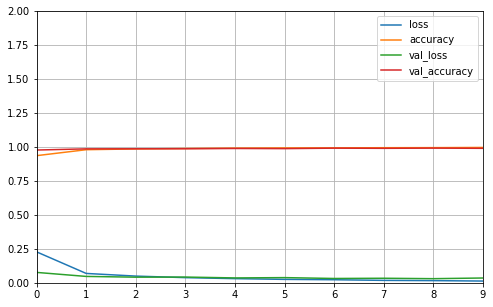

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)

## 测试

In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0353 - accuracy: 0.9895


[0.03529624323654134, 0.98950005]

## 保存

In [11]:
model.save('./save/save_model/model.h5')

In [12]:
model.save_weights('./save/save_weights/model_weights.h5')